





## Submit the results
- Submit your results here: https://forms.gle/WCVb4KMNsgbkuJtr6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is, 19 September 2022, 23:00 CET. After that, the form will be closed.


## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```


In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-20 20:39:53--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  3.22MB/s    in 0.4s    

2022-09-20 20:39:55 (3.22 MB/s) - ‘housing.csv’ saved [1423529/1423529]



The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

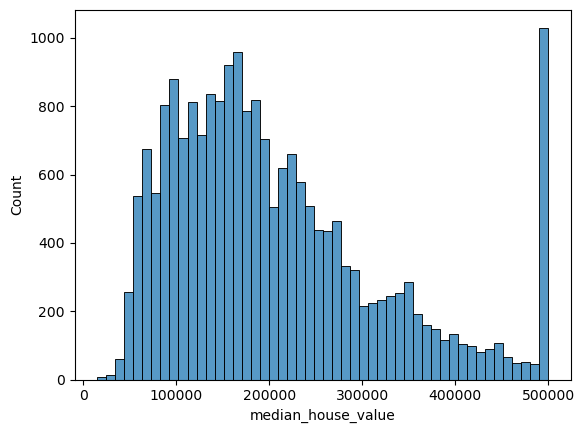

In [5]:
sns.histplot(df.median_house_value, bins=50)

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [6]:
df = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]]

### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

In [8]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188

In [9]:
df.population.median()

1166.0

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [11]:
n = len(df)

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

n, n_train, n_val, n_test

(20640, 12384, 4128, 4128)

In [12]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [18]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [21]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [24]:
def fillna_zeros(df):
    df = df.fillna(0)
    return df.values

def fillna_mean(df):
    mean = df.total_bedrooms.mean()
    df.total_bedrooms = df.total_bedrooms.fillna(mean)
    return df.values

def fillna_median(df):
    median = df.total_bedrooms.median()
    df.total_bedrooms = df.total_bedrooms.fillna(median)
    return df.values

In [36]:
# training and RMSE functions
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def predict_linear_regression(X, w0, w):
    y_pred = w0 + X.dot(w)
    return y_pred

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [42]:
# with 0s
X_train_0 = fillna_zeros(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

X_val_0 = fillna_zeros(df_val)
y_pred_0 = predict_linear_regression(X_val_0, w0, w)
rmse_0 = rmse(y_val, y_pred_0)
round(rmse_0, 2)

0.33

In [41]:
# with mean
# with 0s
X_train_0 = fillna_mean(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

X_val_0 = fillna_mean(df_val)
y_pred_0 = predict_linear_regression(X_val_0, w0, w)
rmse_mean = rmse(y_val, y_pred_0)
round(rmse_mean, 2)

0.33

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

In [43]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [50]:


rreg = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

X_train = fillna_zeros(df_train)
X_val = fillna_zeros(df_val)

for r in rreg:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    rmse_score = round(rmse(y_val, y_pred), 2)
    print ("r: {}, RMSE: {}".format(r, rmse_score))


r: 0, RMSE: 0.33
r: 1e-06, RMSE: 0.33
r: 0.0001, RMSE: 0.33
r: 0.001, RMSE: 0.33
r: 0.01, RMSE: 0.33
r: 0.1, RMSE: 0.33
r: 1, RMSE: 0.33
r: 5, RMSE: 0.34
r: 10, RMSE: 0.34


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

In [59]:
def prepare_dataset_for_seed(seed):
    n = len(df)

    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]
    
    return df_train, y_train, df_val, y_val, df_test, y_test


def train_and_get_rmse(X_train, y_train, X_val, y_val):
    X_train_0 = fillna_zeros(X_train)
    w0, w = train_linear_regression(X_train_0, y_train)

    X_val_0 = fillna_zeros(X_val)
    y_pred_0 = predict_linear_regression(X_val_0, w0, w)
    rmse_0 = rmse(y_val, y_pred_0)
    return rmse_0

In [60]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []
for seed in seeds:
    df_train, y_train, df_val, y_val, df_test, y_test = prepare_dataset_for_seed(seed)
    rmse_scores.append(train_and_get_rmse(df_train, y_train, df_val, y_val))

print(rmse_scores)
std = np.std(rmse_scores)
std = round(std, 3)
print(std)
    

[0.3388430480531396, 0.33623872559559087, 0.3320912318835945, 0.340515360903787, 0.3389024066572963, 0.343486672571951, 0.34519809530995066, 0.3395989927411362, 0.3466230873176718, 0.33659261241898925]
0.004


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

In [73]:
df_train, y_train, df_val, y_val, df_test, y_test = prepare_dataset_for_seed(9)

df_train = pd.concat([df_train, df_val])
y_train = np.concatenate([y_train, y_val])

X_train_0 = fillna_zeros(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

X_val_0 = fillna_zeros(df_test)
y_pred_0 = predict_linear_regression(X_val_0, w0, w)
rmse_0 = rmse(y_test, y_pred_0)
print(rmse_0)

0.34531495071714047
